In [656]:
import keras
from keras import models, layers
from keras import datasets
from keras import backend
import numpy as np
import matplotlib.pyplot as plt

In [657]:
num_classes = 10
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [658]:
N,H,W = X_train.shape

if backend.image_data_format() == 'channels_first':
    X_train = X_train[:,np.newaxis,:,:]
    X_test = X_test[:,np.newaxis,:,:]
    input_shape = (1, H, W)

elif backend.image_data_format() == 'channels_last':
    X_train = X_train[:,:,:,np.newaxis]
    X_test = X_test[:,:,:,np.newaxis]
    input_shape = (H, W, 1)

In [659]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [660]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', input_shape = input_shape)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same'))  
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.20))


model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))  
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))  
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))


model.add(layers.Flatten())  

model.add(layers.Dense(512)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))


model.add(layers.Dense(64)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))


model.add(layers.Dense(num_classes, activation='softmax'))  

In [661]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_192 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_297 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
activation_297 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_298 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
activation_298 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_186 (Dropout)        (None, 28, 28, 32)      

In [662]:
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [663]:
model.fit(X_train, Y_train, batch_size=100, epochs=50, validation_split=.2, verbose=2)

Epoch 1/50
480/480 - 5s - loss: 0.4688 - accuracy: 0.8378 - val_loss: 0.5534 - val_accuracy: 0.8027
Epoch 2/50
480/480 - 4s - loss: 0.2903 - accuracy: 0.8946 - val_loss: 0.2423 - val_accuracy: 0.9119
Epoch 3/50
480/480 - 4s - loss: 0.2513 - accuracy: 0.9078 - val_loss: 0.2180 - val_accuracy: 0.9185
Epoch 4/50
480/480 - 4s - loss: 0.2280 - accuracy: 0.9155 - val_loss: 0.2287 - val_accuracy: 0.9168
Epoch 5/50
480/480 - 4s - loss: 0.2094 - accuracy: 0.9230 - val_loss: 0.1909 - val_accuracy: 0.9313
Epoch 6/50
480/480 - 4s - loss: 0.1940 - accuracy: 0.9287 - val_loss: 0.1787 - val_accuracy: 0.9334
Epoch 7/50
480/480 - 4s - loss: 0.1821 - accuracy: 0.9323 - val_loss: 0.1921 - val_accuracy: 0.9319
Epoch 8/50
480/480 - 4s - loss: 0.1758 - accuracy: 0.9344 - val_loss: 0.1763 - val_accuracy: 0.9349
Epoch 9/50
480/480 - 4s - loss: 0.1650 - accuracy: 0.9391 - val_loss: 0.3042 - val_accuracy: 0.8913
Epoch 10/50
480/480 - 4s - loss: 0.1561 - accuracy: 0.9408 - val_loss: 0.1717 - val_accuracy: 0.9368

In [664]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    plt.savefig('Loss_Plot.png', dpi=300)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])
    plt.savefig('zAcc_Plot.png', dpi=300)
    plt.show()

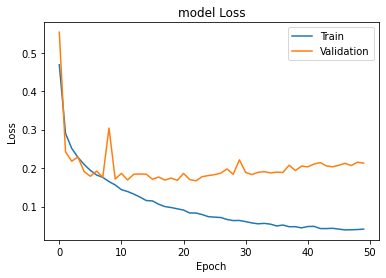

In [665]:
plot_loss(model.history)

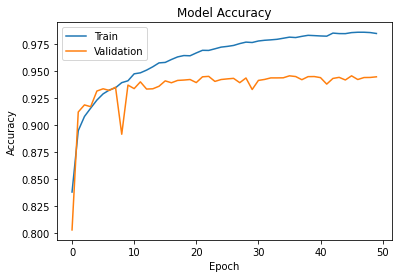

In [666]:
plot_acc(model.history)

In [667]:
# evaluation
model_performance = model.evaluate(X_test, Y_test, batch_size=100)
print('loss: {}\nAccuray: {}'.format(*model_performance))

100/100 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9435
loss: 0.24013271927833557
Accuray: 0.9434999823570251


In [668]:
model.save('my_model.h5')